# Smoking is bad

In [29]:
# TODO: install all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [30]:
# TODO: load the data using the pathlib library to create the path to your data
data_path = Path("data/smoking_data.csv")  # Update with your actual file path
df = pd.read_csv(data_path)
print(df.head())

   Unnamed: 0 outcome smoker  age  gender   salary
0           0   Alive    Yes   23  female   7286.0
1           1   Alive    Yes   18    male      NaN
2           2    Dead    Yes   71    male      NaN
3           3   Alive     No   67    male      NaN
4           4   Alive     No   64  female  20123.0


In [31]:
# TODO: what are the dimensions of the data frame?
dimensions = df.shape
print(f"The data frame has {dimensions[0]} rows and {dimensions[1]} columns.")

The data frame has 1314 rows and 6 columns.


In [32]:
# TODO: use .describe() on your data frame: what do you notice about the string columns?
description = df.describe(include='all')
print(description)

         Unnamed: 0 outcome smoker          age gender        salary
count   1314.000000    1314   1314  1314.000000   1314    614.000000
unique          NaN       2      2          NaN      2           NaN
top             NaN   Alive     No          NaN   male           NaN
freq            NaN     945    732          NaN    693           NaN
mean     656.500000     NaN    NaN    46.920091    NaN  48737.265472
std      379.463437     NaN    NaN    17.432027    NaN  28575.395264
min        0.000000     NaN    NaN    18.000000    NaN   1215.000000
25%      328.250000     NaN    NaN    32.000000    NaN  24112.250000
50%      656.500000     NaN    NaN    46.000000    NaN  48692.000000
75%      984.750000     NaN    NaN    61.000000    NaN  72946.250000
max     1313.000000     NaN    NaN    84.000000    NaN  99677.000000


In [33]:
# TODO: do not forget to check the null values
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Unnamed: 0      0
outcome         0
smoker          0
age             0
gender          0
salary        700
dtype: int64


In [37]:
# TODO: prepare your data frame so that you can work with
df['Alive_binary'] = df['outcome'].apply(lambda x: 1 if x == 'Alive' else 0)

## Smoking analysis
Let's first check what your cousin did.

In [36]:
# TODO: Reimplement the small code snippet described in the problem set instructions.
df1 = df.groupby(["smoker"]).agg(prob=("Alive_binary", np.mean))
print(df1.head())


            prob
smoker          
No      0.685792
Yes     0.761168


/var/folders/n0/0fjdkfxd0vq4wcf26xqj7j9w0000gn/T/ipykernel_31635/2311734690.py:2: FutureWarning: The provided callable <function mean at 0x10641df70> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1 = df.groupby(["smoker"]).agg(prob=("Alive_binary", np.mean))


You should get the same results.

# Is smoking really good?
Now it is up to you to run the analysis further and check what could be underlying your cousings results.

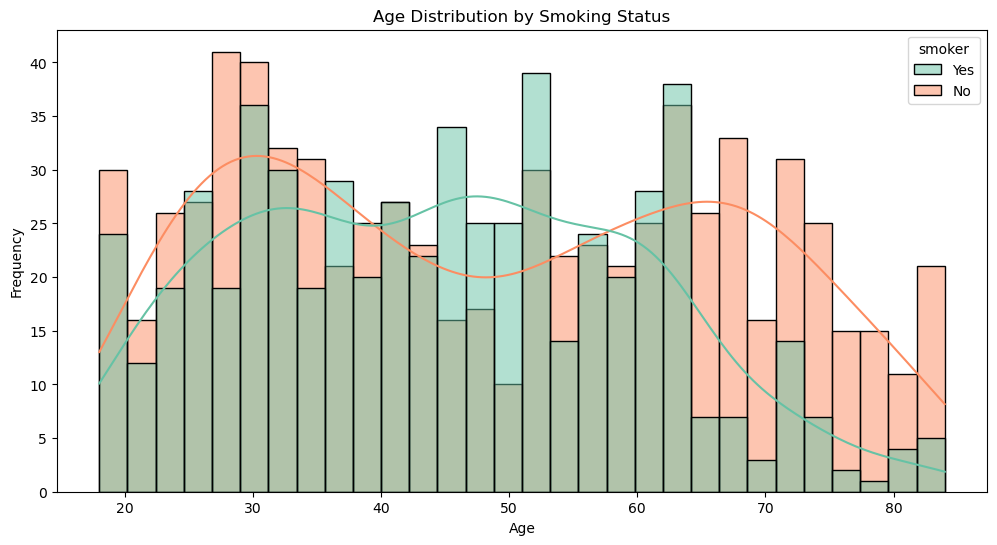

Text(0.5, 1.0, 'Gender Distribution')

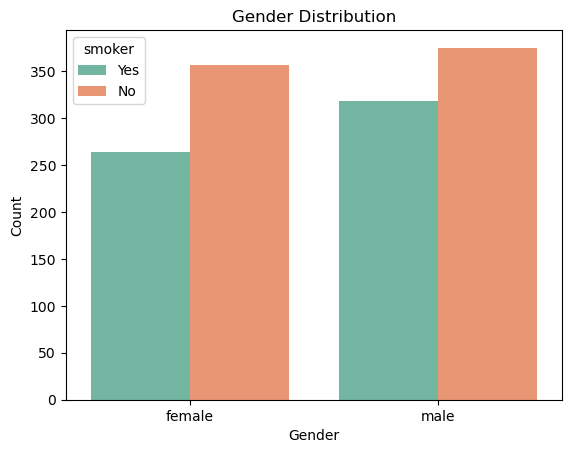

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="age", hue="smoker", kde= True, bins=30, palette="Set2")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Smoking Status")
plt.show()

sns.countplot(data=df, x="gender", hue = "smoker", palette="Set2")
# Label the axes and give the plot a title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")

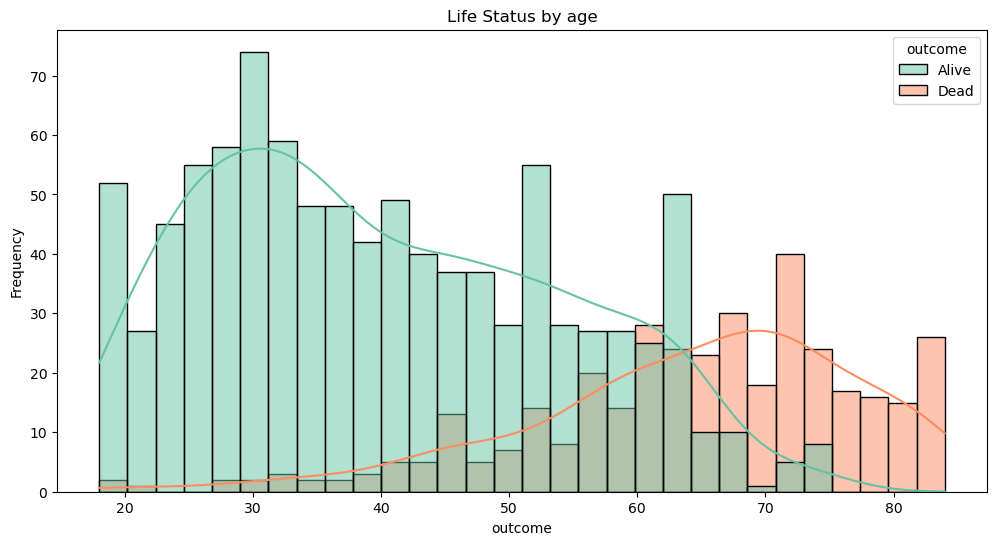

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="age", hue="outcome", kde= True, bins=30, palette="Set2")
plt.xlabel("outcome")
plt.ylabel("Frequency")
plt.title("Life Status by age")
plt.show()

As can be seen in the figures above, whether to smoke or not also depends on age and gender. It is worth to mention the people with higher age have less possibility to smoke and higher possibility to be dead. Thus this may cause the bias in the result of the probability of survival.